In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
 df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

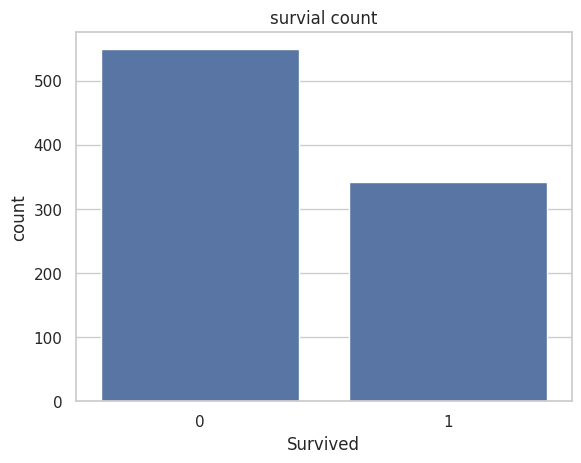

In [13]:
sns.countplot(x='Survived',data = df)
plt.title('survial count')
plt.show()

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

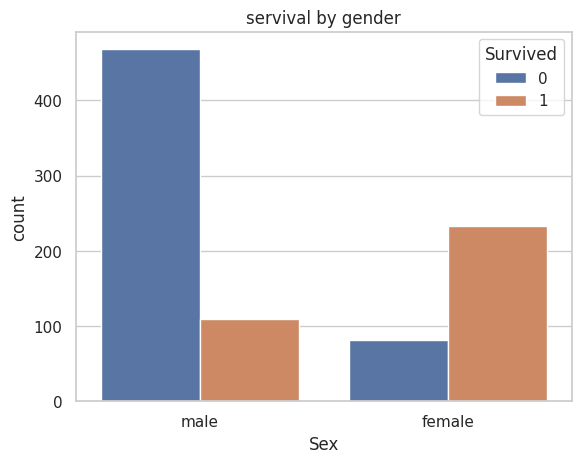

In [15]:
#Sex vs Survival
sns.countplot(x='Sex', hue = 'Survived', data =df)
plt.title("servival by gender")
plt.show()

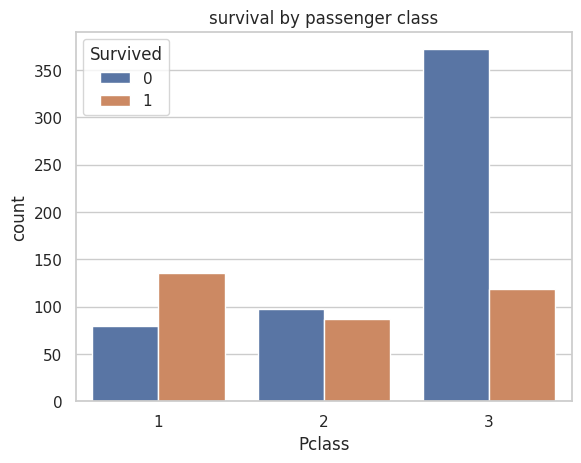

In [16]:
#Passenger Class vs Survival
sns.countplot(x = 'Pclass', hue = 'Survived', data= df)
plt.title('survival by passenger class')
plt.show()

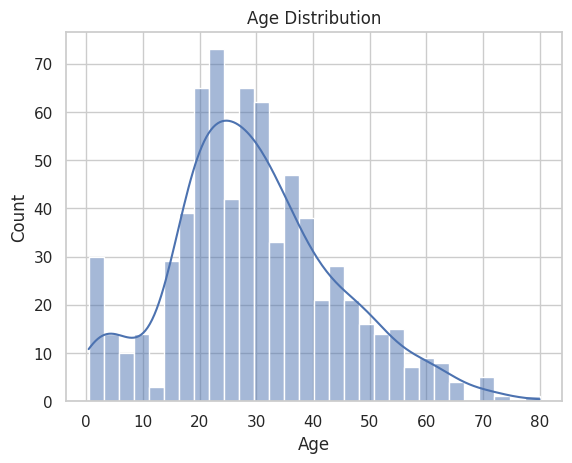

In [17]:
# Age distribution 
sns.histplot(df['Age'], bins = 30, kde =True)
plt.title("Age Distribution")
plt.show()

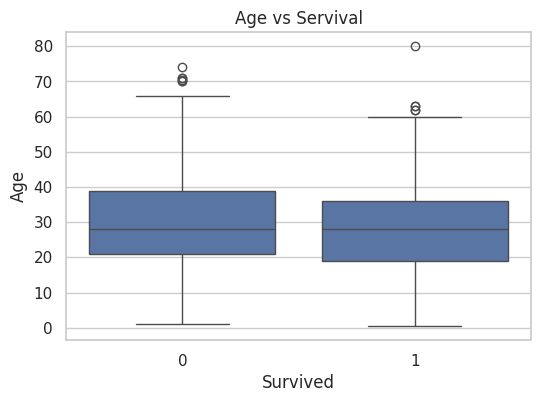

In [18]:
# Age vs Survival
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Survived', y='Age', data = df)
plt.title('Age vs Servival')
plt.show()

In [19]:
df['FamilySize']=df['SibSp']+df['Parch']+1

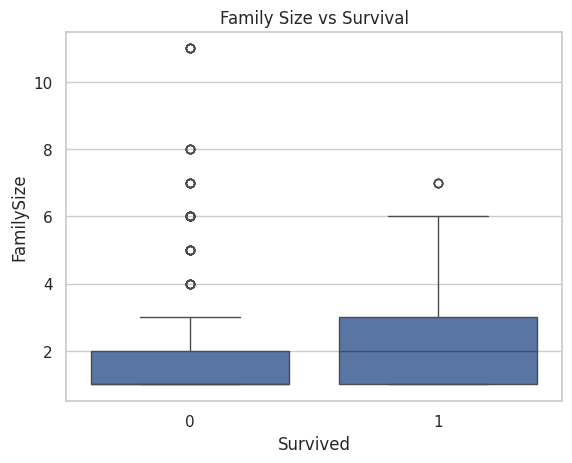

In [20]:
sns.boxplot(x='Survived', y='FamilySize',data = df)
plt.title("Family Size vs Survival")
plt.show()

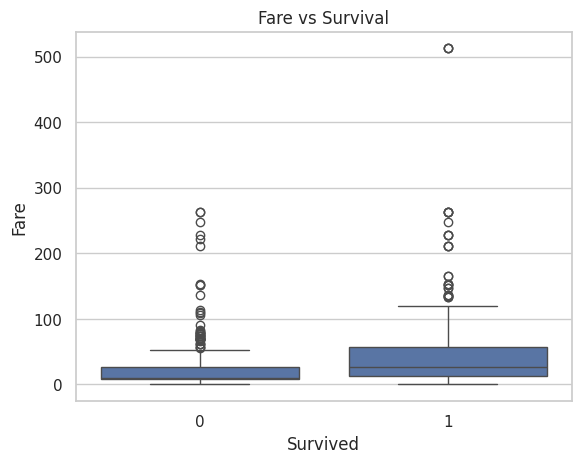

In [21]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

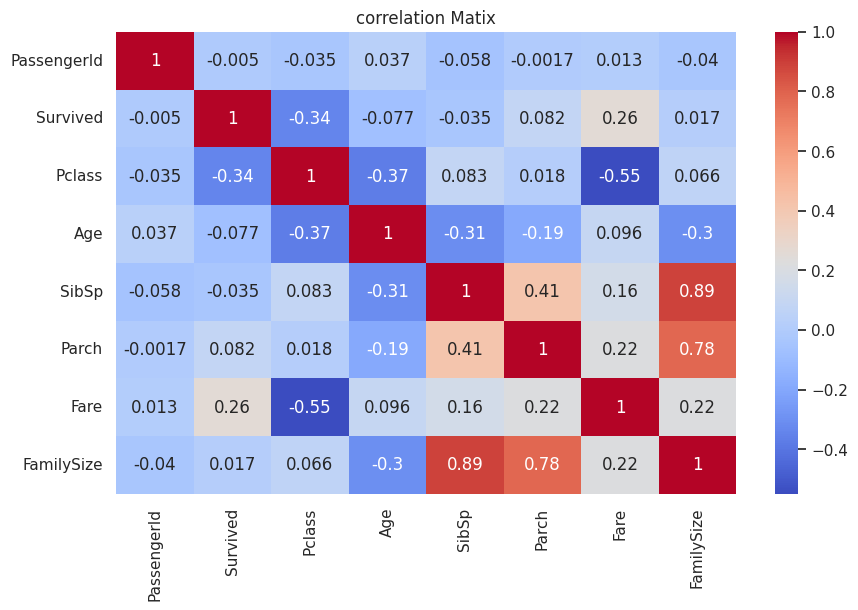

In [22]:
plt.figure(figsize = (10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot = True, cmap = "coolwarm")
plt.title("correlation Matix")
plt.show()

In [23]:
# Data cleaning 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [24]:
# age is important so we cannot drop column
# Age distribution is skewed therefore median is more safer 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [25]:
# fill just common value in embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [26]:
# drop Cabin because it contains lots of missing values
df = df.drop(columns = ['Cabin'])

In [28]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket'])

In [29]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [32]:
#  encoding categorical variables
df.select_dtypes(include = ['object']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [37]:
df['sex'] = df['Sex'].map({'male':0, 'female':1})

In [ ]:
df = pd.get_dummies(df,columns = ['Embarked'], drop_first= True)

In [38]:
df.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
sex             int64
dtype: object

In [39]:
df = df.drop(columns=['Sex', 'Embarked'])

In [40]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
FamilySize      int64
sex             int64
dtype: object

In [41]:
# never scale y
y = df['Survived']
X = df.drop('Survived', axis=1)

In [42]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [48]:
x_scaled = scaler.fit_transform(X)

In [49]:
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)

In [51]:
x_scaled.describe()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,sex
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,2.272780e-16,4.386066e-17,5.382900e-17,3.987333e-18,-2.392400e-17,3.987333e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.609748e-01,-7.376951e-01
25%,-3.693648e-01,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.609748e-01,-7.376951e-01
50%,8.273772e-01,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.609748e-01,-7.376951e-01
75%,8.273772e-01,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,5.915988e-02,1.355574e+00
max,8.273772e-01,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00,5.640372e+00,1.355574e+00


In [52]:
from sklearn.model_selection import train_test_split


In [54]:
X_train, X_test, y_train, y_test = train_test_split( x_scaled,y,test_size=0.2,random_state=42)

In [55]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (712, 7)
X_test : (179, 7)
y_train: (712,)
y_test : (179,)


In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression(max_iter=1000)


In [58]:
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [59]:
y_pred = log_model.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7988826815642458


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

